In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.simplefilter('ignore')
plt.style.use('dark_background')

In [2]:
Housing2 = pd.read_csv('Transformed_Housing_Data2.csv')
Housing2.head()

,Sale_Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Waterfront_View_Yes,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,7,1180.0,0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,7,2170.0,400,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,6,770.0,0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,7,1050.0,910,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,8,1680.0,0,...,0,0,0,0,1,0,0,0,0,0


In [3]:
Housing2['mean_sales'] = Housing2['Sale_Price'].mean()
Housing2['mean_sales'].head()

0    511618.558147
1    511618.558147
2    511618.558147
3    511618.558147
4    511618.558147
Name: mean_sales, dtype: float64

In [4]:
Housing2["Overall Grade"].unique()

array([ 7,  6,  8, 10,  9,  5,  4,  3,  2,  1], dtype=int64)

In [5]:
gradewise_list = []
for i in range(1,11):
  k = Housing2["Sale_Price"][Housing2["Overall Grade"] == i]
  gradewise_list.append(k)

In [6]:
classwise_list = []
for i in range(1,11):
  k = Housing2["Sale_Price"][Housing2["Overall Grade"] == i]
  classwise_list.append(k)

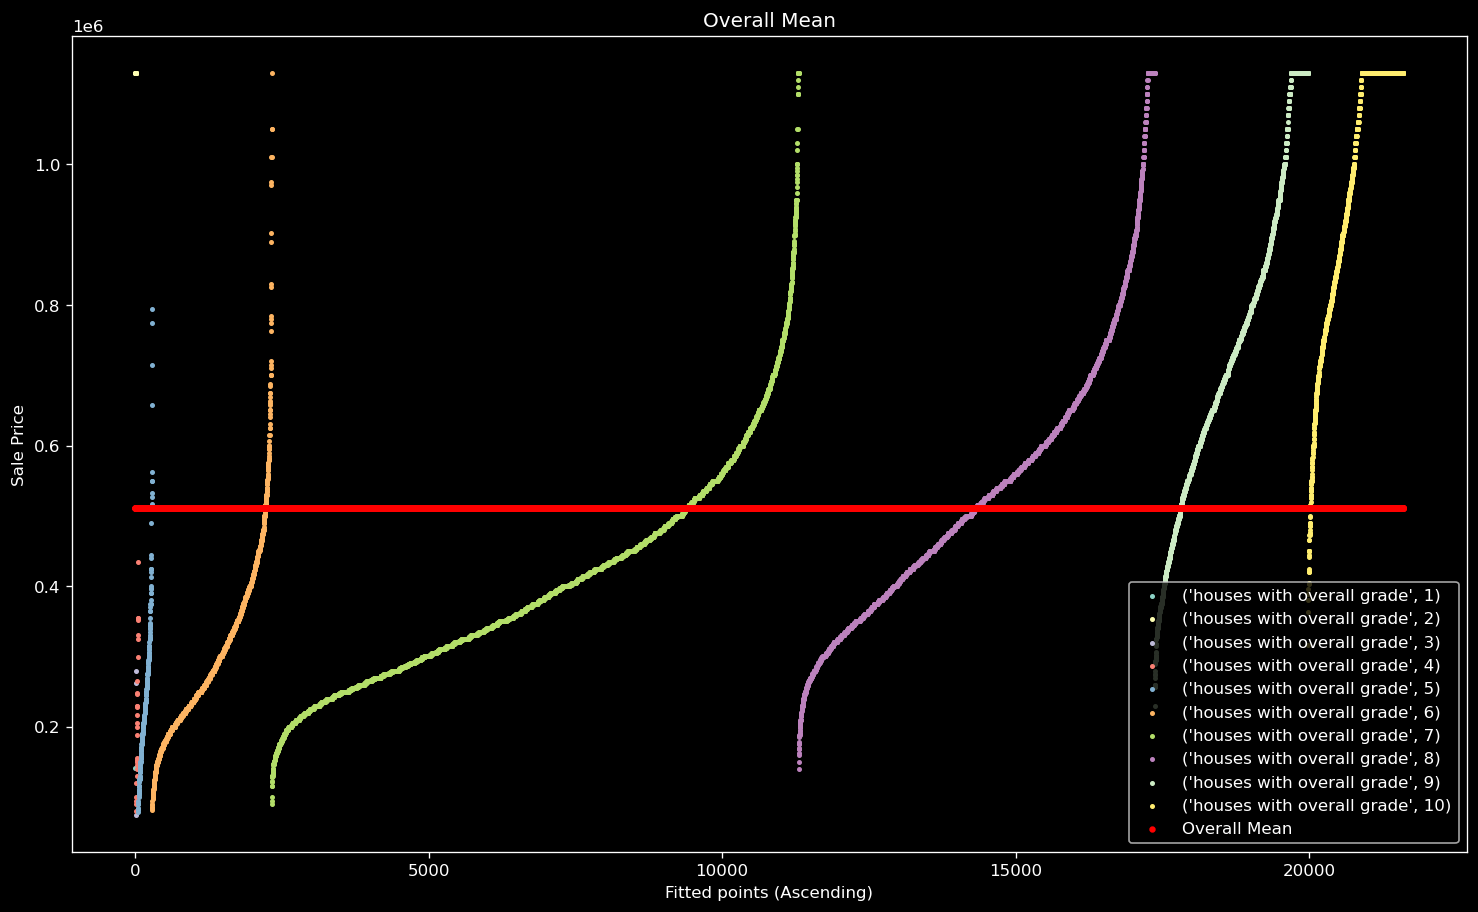

In [7]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # plotting
  plt.scatter( points, # x-axis
              np.sort(gradewise_list[i-1], axis = 0) , # y-axis
              label = ('houses with overall grade', i), s = 4 )            
  z = max(points) + 1 # updating z for next plot

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         Housing2['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 8)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend( loc = 4)

In [8]:
grades_mean = Housing2.pivot_table(values = 'Sale_Price' , columns = 'Overall Grade', aggfunc = np.mean)
grades_mean

Overall Grade,1,2,3,4,5,6,7,8,9,10
Sale_Price,142000.0,1129575.0,205666.666667,214381.034483,248523.971074,301882.01472,402239.619779,537584.082097,736936.769025,960408.078866


In [9]:
# making new column
Housing2['grade_mean'] = 0

# for every grade fill its mean price in new column
for i in grades_mean.columns:
  Housing2['grade_mean'][Housing2['Overall Grade'] == i] = grades_mean[i][0]
  
Housing2['grade_mean'].head()

0    402239.619779
1    402239.619779
2    301882.014720
3    402239.619779
4    537584.082097
Name: grade_mean, dtype: float64

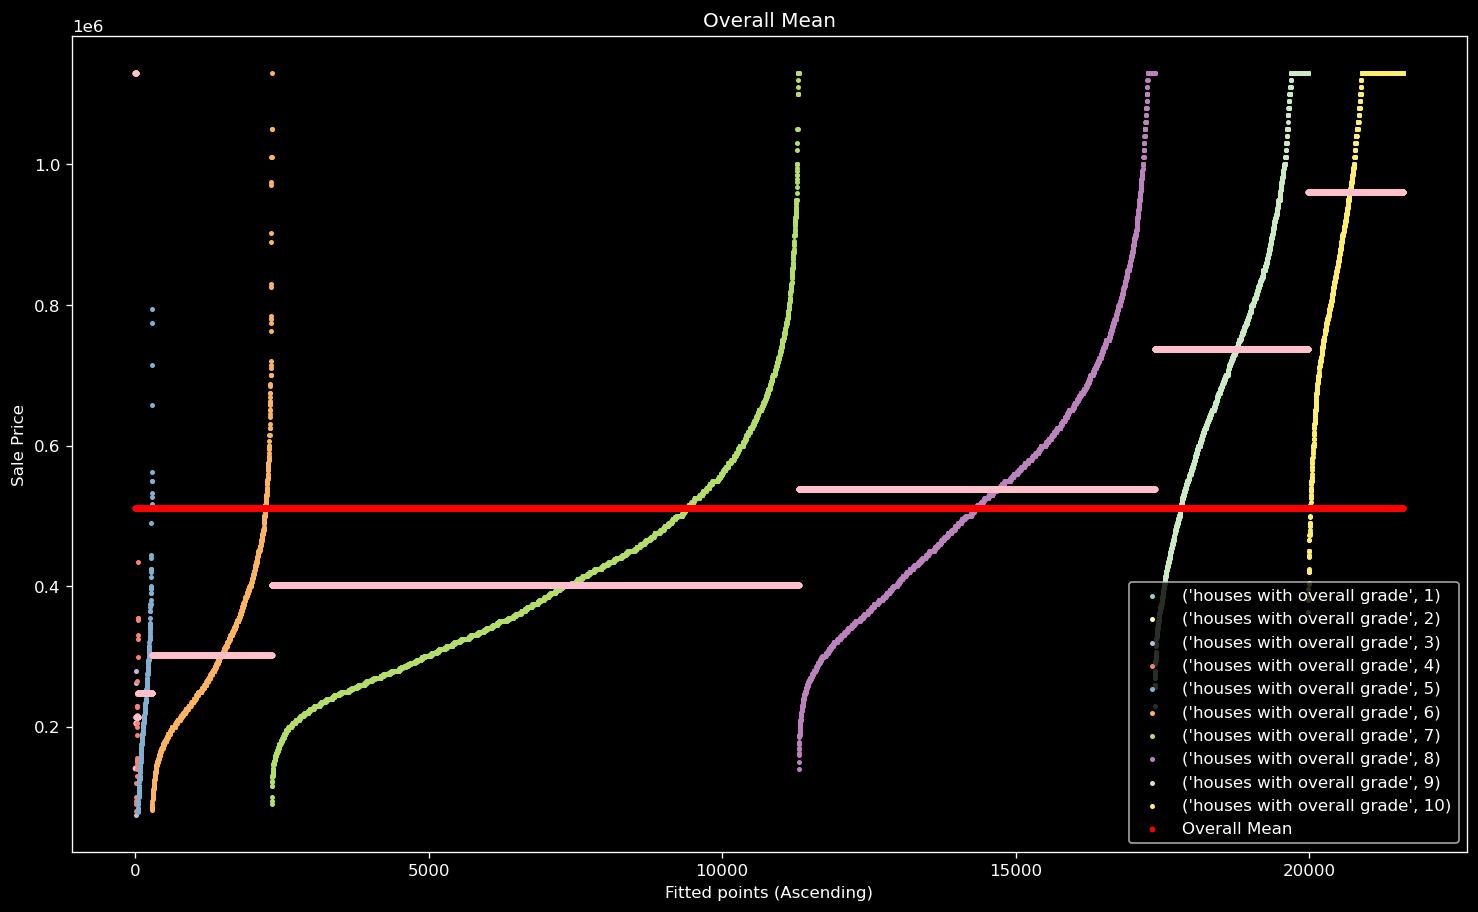

In [10]:
plt.figure( dpi = 120, figsize = (15,9) )

#### Plotting "Sale_Price" gradewise ####
# z variable is for x-axis
z = 0
for i in range(1,11):
  # defining x-axis using z
  points = [k for k in range(z, z + len(gradewise_list[i-1]))]
  # Plotting
  plt.scatter( points,
              gradewise_list[i-1].sort_values(),
              label = ('houses with overall grade', i), s = 4 )
  # Plotting gradewise mean
  plt.scatter( points,
              [classwise_list[i-1].mean() for q in range(len(classwise_list[i-1]))],
              s = 6, color = 'pink'
              )          
  z = max(points) + 1

#### plotting Overall Mean ####
plt.scatter([q for q in range(0, z)],
         Housing2['mean_sales'],
         color = 'red',
         label = 'Overall Mean',
         s = 6)

plt.xlabel('Fitted points (Ascending)')
plt.ylabel("Sale Price")
plt.title('Overall Mean')
plt.legend(loc = 4)

## Residual Plot

Residual = Prediction - Actual

In [11]:
# Model 1 -> prediction tenique is 'Sale_Price' of new home will be the mean of sales

In [12]:
# Model 2 -> we've plotted gradewise mean 'Sale_Price', so the prediction technique is the 'Sale_Price' of new home will be the mean 'Sale_Price' of the grade the new home belongs

In [13]:
mean_difference = Housing2['mean_sales'] - Housing2['Sale_Price']
grade_mean_difference = Housing2['grade_mean'] - Housing2['Sale_Price']

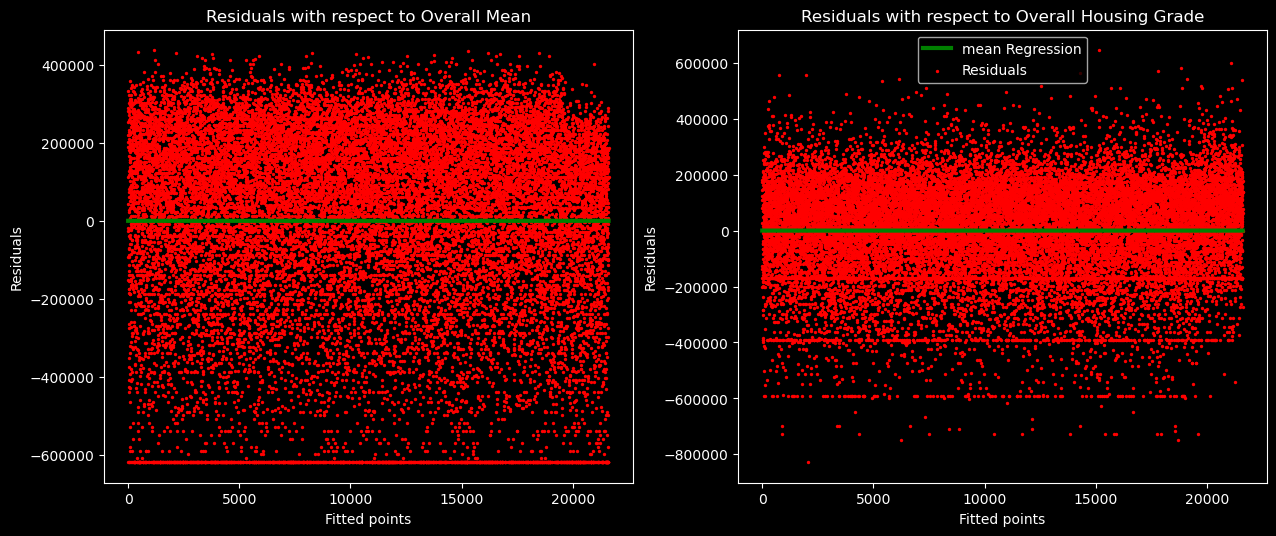

In [14]:
k = range(0, len(Housing2))
l = [0 for i in range(len(Housing2))]

plt.figure( figsize = (15,6), dpi =100)

plt.subplot(1,2,1)
plt.scatter( k , mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.title('Residuals with respect to Overall Mean')

plt.subplot(1,2,2)
plt.scatter( k , grade_mean_difference, color = 'red', label = 'Residuals', s = 2 )
plt.plot( k , l, color = 'green', label = 'mean Regression', linewidth = 3)
plt.xlabel('Fitted points')
plt.ylabel("Residuals")
plt.legend()
plt.title("Residuals with respect to Overall Housing Grade")

plt.legend()

## Evaluating the Models

In [15]:
# Calculating Mean Error

# mean_difference = mean - actual

In [16]:
mean_error = sum(mean_difference)/len(Housing2)
print(round(mean_error, 7))

0.0


### 1. Mean Absolute Error 

In [17]:
Y = Housing2["Sale_Price"]
Y_hat1 = Housing2["mean_sales"]
Y_hat2 = Housing2['grade_mean']
n = len(Housing2)

len(Y), len(Y_hat1), len(Y_hat2), n

(21609, 21609, 21609, 21609)

In [18]:
mean_absolute_error1 = sum(abs(Y_hat1 - Y))/n
mean_absolute_error1

199168.78146839526

In [19]:
mean_absolute_error2 = sum(abs(Y_hat2 - Y))/n
mean_absolute_error2

137081.70298203363

In [20]:
# calculating MAE using scikit-learn library

In [21]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error_2 = mean_absolute_error(Y_hat2, Y)
mean_absolute_error_2

137081.7029820291

### 2. Mean Squared Error

In [22]:
from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error( Y_hat1, Y)
mse2 = mean_squared_error(Y_hat2, Y)
mse1, mse2

(62528116847.799576, 30804835720.342426)

### 3. Root Mean Squared Error

In [23]:
from sklearn.metrics import mean_squared_error
rmse1 = mean_squared_error( Y_hat1, Y)**0.5
rmse2 = mean_squared_error(Y_hat2, Y)**0.5
rmse1, rmse2

(250056.2273725643, 175513.06424406826)

### 4. R^2

R2 = 1 - mse(predicted val of sales price)/mse(mean of sales price)

In [24]:
Y = Housing2["Sale_Price"]
Y_bar = Housing2["mean_sales"]
Y_hat = Housing2['grade_mean']
n = len(Housing2)

len(Y), len(Y_bar), len(Y_hat), n

(21609, 21609, 21609, 21609)

In [25]:
mse_mean = mean_squared_error( Y_bar, Y)
mse_mean

62528116847.799576

In [26]:
mse_model = mean_squared_error( Y_hat, Y)
mse_model

30804835720.342426

In [27]:
R2 = 1 - (mse_model / mse_mean)
R2

0.5073442592981836

In [28]:
#calculating R2 using scikit-learn library

In [29]:
from sklearn.metrics import r2_score
score = r2_score(Y, Y_hat)
score

0.5073442592981836

In [30]:
from sklearn.metrics import mean_squared_error as mse

In [31]:
sale_price = Housing2["Sale_Price"].head(30)
flat_area = Housing2['Flat Area (in Sqft)'].head(30)
sample_Housing2 = pd.DataFrame({ 'sale_price': sale_price,
                              'flat_area': flat_area})
sample_Housing2

,sale_price,flat_area
0,221900.0,1180.0
1,538000.0,2570.0
2,180000.0,770.0
3,604000.0,1960.0
4,510000.0,1680.0
5,1129575.0,5420.0
6,257500.0,1715.0
7,291850.0,1060.0
8,229500.0,1780.0
9,323000.0,1890.0


## Plotting th Housing2

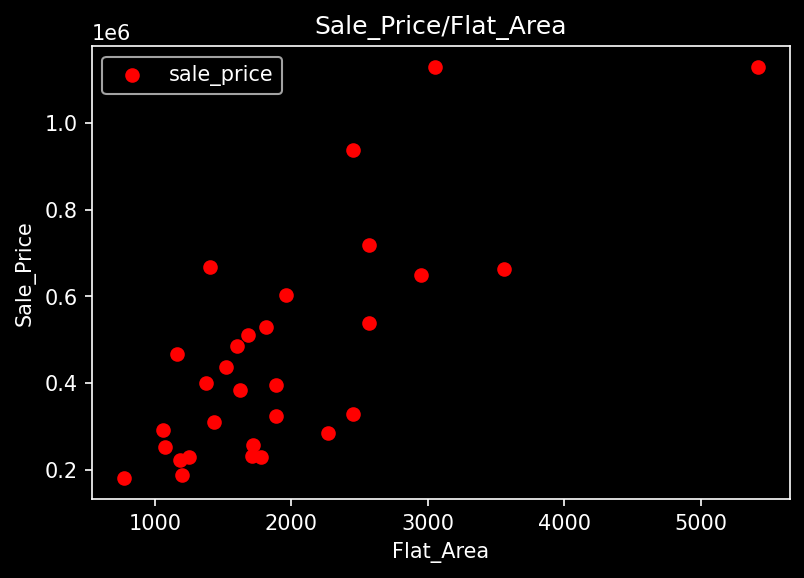

In [32]:
plt.figure( dpi = 150)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price, color = 'red', label = 'sale_price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

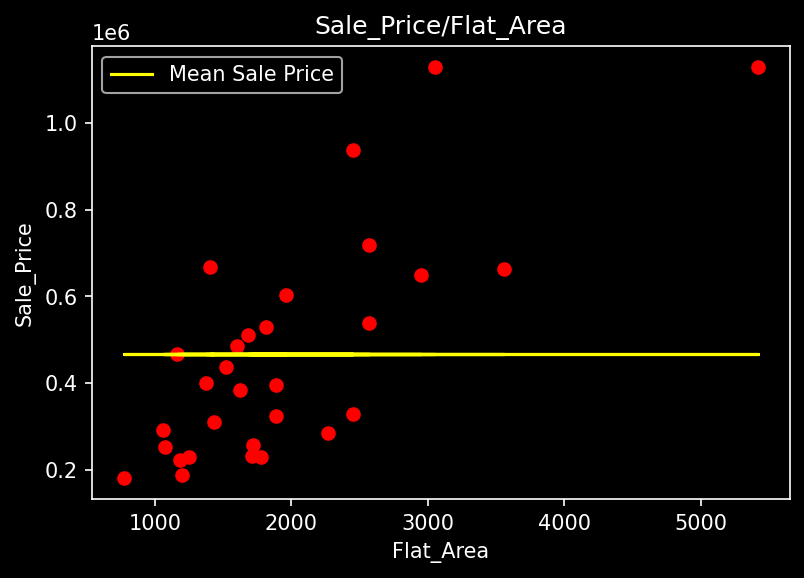

In [33]:
sample_Housing2['mean_sale_price'] = sample_Housing2.sale_price.mean()


plt.figure( dpi = 150)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price, color = 'red')
plt.plot(sample_Housing2.flat_area, sample_Housing2.mean_sale_price, color = "yellow", label = 'Mean Sale Price')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.title("Sale_Price/Flat_Area")
plt.legend()
plt.show()

Text(0.5, 1.0, 'Slope 0 with MSE 281372081125.0')

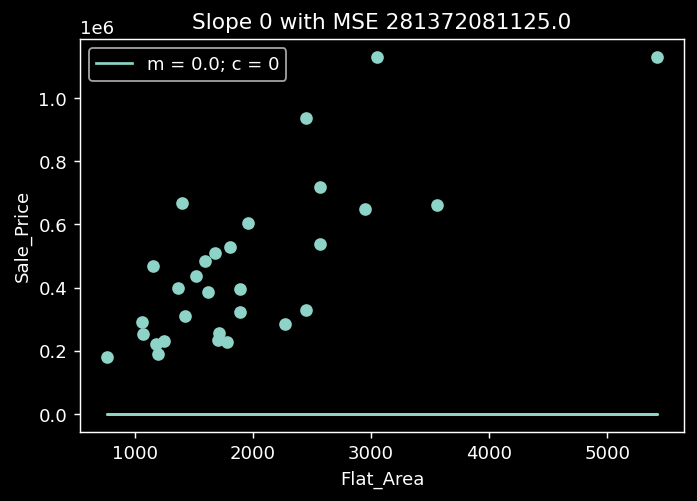

In [34]:
c = 0
m = 0

line = []

for i in range(len(sample_Housing2)):
    line.append(sample_Housing2.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price)
plt.plot(sample_Housing2.flat_area, line, label = 'm = 0.0; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_Housing2.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

Text(0.5, 1.0, 'Slope 50 with MSE 184728400708.33334')

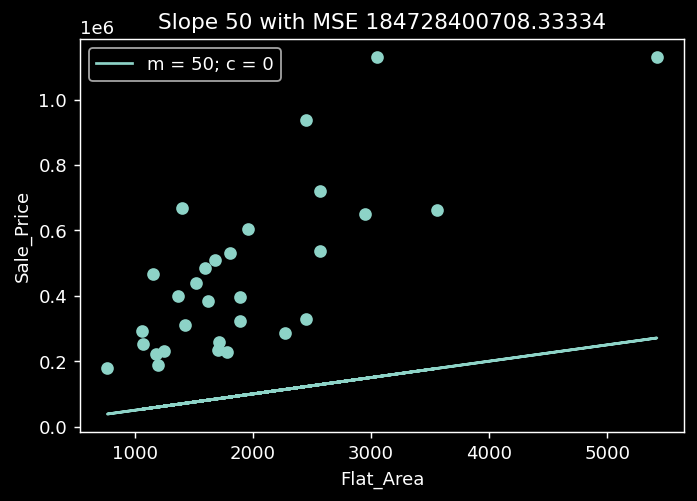

In [35]:
c = 0
m = 50

line = []

for i in range(len(sample_Housing2)):
    line.append(sample_Housing2.flat_area[i] * m + c)

plt.figure(dpi = 130)
plt.scatter(sample_Housing2.flat_area, sample_Housing2.sale_price)
plt.plot(sample_Housing2.flat_area, line, label = 'm = 50; c = 0')
plt.xlabel('Flat_Area')
plt.ylabel('Sale_Price')
plt.legend()
MSE = mse(sample_Housing2.sale_price, line)
plt.title("Slope "+str(m)+" with MSE "+ str(MSE))

In [36]:
def slope_Error( slope, intercept ,  sample_Housing2):
    sale = []
    for i in range(len(sample_Housing2.flat_area)):
        tmp = sample_Housing2.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_Housing2.sale_price, sale)
    return MSE

In [37]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 0, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [38]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.526038e+11
4996,499.6,3.528488e+11
4997,499.7,3.530938e+11
4998,499.8,3.533389e+11
4999,499.9,3.535842e+11


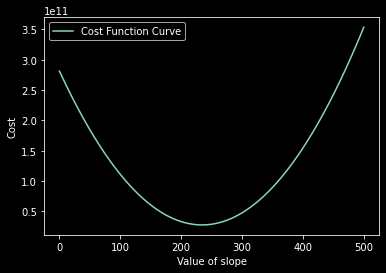

In [39]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [40]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

234.3

In [41]:
def intercept_Error( slope, intercept ,  sample_Housing2):
    sale = []
    for i in range(len(sample_Housing2.flat_area)):
        tmp = sample_Housing2.flat_area[i] * slope + intercept
        sale.append(tmp)
    MSE = mse(sample_Housing2.sale_price, sale)
    return MSE

In [42]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 234, intercept = i, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [43]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.779911e+10
1,5001,2.779909e+10
2,5002,2.779908e+10
3,5003,2.779907e+10
4,5004,2.779906e+10


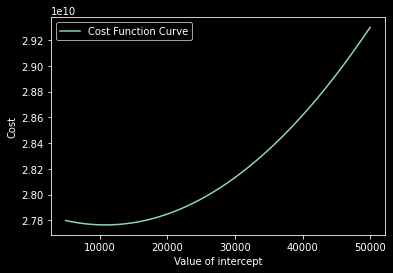

In [44]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [45]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

10834

In [46]:
slope = [i/10 for i in range(0,5000)]
Cost = []
for i in slope:
    cost = slope_Error( slope = i, intercept = 10834, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [47]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'slope' : slope,
    'Cost' : Cost
})
Cost_table.tail()

,slope,Cost
4995,499.5,3.636767e+11
4996,499.6,3.639259e+11
4997,499.7,3.641751e+11
4998,499.8,3.644245e+11
4999,499.9,3.646739e+11


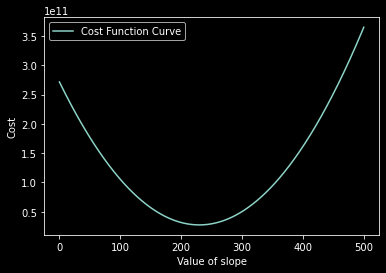

In [48]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.slope, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of slope')
plt.ylabel('Cost')
plt.legend()

In [49]:
new_slope = Cost_table['slope'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_slope[0]

229.7

In [50]:
intercept = [i for i in range(5000,50000)]
Cost = []
for i in intercept:
    cost = intercept_Error( slope = 229.7, intercept = i, sample_Housing2 = sample_Housing2)
    Cost.append(cost)

In [51]:
# Arranging in DataFrame
Cost_table = pd.DataFrame({
    'intercept' : intercept,
    'Cost' : Cost
})
Cost_table.head()

,intercept,Cost
0,5000,2.781305e+10
1,5001,2.781302e+10
2,5002,2.781299e+10
3,5003,2.781296e+10
4,5004,2.781293e+10


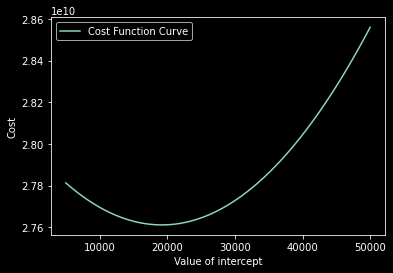

In [52]:
# plotting the cost values corresponding to every value of Beta
plt.plot(Cost_table.intercept, Cost_table.Cost, label = 'Cost Function Curve')
plt.xlabel('Value of intercept')
plt.ylabel('Cost')
plt.legend()

In [55]:
new_intercept = Cost_table['intercept'][Cost_table['Cost'] == Cost_table['Cost'].min()].values
new_intercept[0]

19199